In [1]:

import warnings
warnings.filterwarnings('ignore')

##################################
#The notebook needed
%matplotlib inline 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
OutputDir='./Output'
import pickle
import spatial_plots_Agos as spa
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

##################################
# General
import itertools
import numpy as np
from scipy.special import erf
from scipy import optimize
import math
import random
import scipy as sp
from tqdm import tqdm
from scipy.stats import norm
from numpy import matlib as ml
from scipy import optimize


#######################################
# Colormaps
import matplotlib.colors as mc
import matplotlib._color_data as mcd
import colorsys
import matplotlib.colors as mcolors
import matplotlib



def lighten_color(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        try:
            c= mcd.XKCD_COLORS[color].upper()
        except:
            c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])





In [224]:
reload(spa)

dir_2_data   = '/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/'
dir_2_output ='/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_SizeContrast/Output/Output_Data_Locomotion/'

rf_dist =True
Locomotion ='Stationary' 
ncutoff =5
nbin =5
amp_cond =False
sig_cond =True
sqe_cond =True
dmax =50
expttype='size_contrast_0'
datafield='decon'
running_pct_cutoff=0.1
running_speed_threshold=0.1

this_data_class=spa.Spatial_Data(dir_2_data,dir_2_output, Locomotion, pval=0.1, ncutoff=ncutoff ,rf_dist=rf_dist , sig_cond=sig_cond, sqe_cond=sqe_cond, nbin=nbin, dmax=dmax )
#stat_loco_data_responsive, stat_loco_data_all=this_data_class.get_size_contrast_centered_ori_averaged_locomotion_data_all_celltypes(expttype='size_contrast_0',running_pct_cutoff=running_pct_cutoff, running_speed_threshold=running_speed_threshold, which_normalization='individual_sum')




Destructor called, instance deleted.


In [225]:
this_data_class.ucontrast

array([  0,   6,  12,  25,  50, 100])

In [226]:
celltype_name='pyr_l23'

tunings_l23, uparams_decon_l23, \
displacements_l23, pvals_l23, ret_info_l23 =\
this_data_class.load_extracted_lists_from_raw_each_locomotion_control(celltype_name, \
                                                                      expttype='size_contrast_0' ,\
                                                                      datafield='decon',\
                                                                      running_pct_cutoff=running_pct_cutoff, \
                                                                      fill_nans_under_cutoff=True,\
                                                                      running_speed_threshold=running_speed_threshold)

celltype_name='pyr_l4'

tunings_l4, uparams_decon_l4, \
displacements_l4, pvals_l4, ret_info_l4 =\
this_data_class.load_extracted_lists_from_raw_each_locomotion_control(celltype_name, \
                                                                      expttype='size_contrast_0' ,\
                                                                      datafield='decon',\
                                                                      running_pct_cutoff=running_pct_cutoff, \
                                                                      fill_nans_under_cutoff=True,\
                                                                      running_speed_threshold=running_speed_threshold)


Lists_from_raw--expttype=size_contrast_0-datafield=decon-running_pct_cutoff=0.1-running_speed_threshold=0.1-pyr_l23
Lists_from_raw--expttype=size_contrast_0-datafield=decon-running_pct_cutoff=0.1-running_speed_threshold=0.1-pyr_l4


In [227]:
this_data_class.ucontrast


array([  0,   6,  12,  25,  50, 100])

In [228]:


def compute_SMI(tunings,percell):
    print('n of sesh = '+str(len(tunings)))
    all_60_over_max=[]
    all_60_over_max_per_cell=[]

    for k in range(1,len(tunings)):
        try:
            this_sess_tuning = tunings[k]
            data = np.nanmean(np.nanmean(this_sess_tuning[:,:6,[0,-5,-4,-3,-2,-1],:,8:-8],-1),-1)
            data=data/np.nanmean(data)
#             print(data.shape)

            if percell:
                #This is one way of computing it
                evoked_60_per_cell=(data[:,-1,1:]-ml.repmat(data[:,0,0],5,1).T)
                evoked_max_per_cell=(np.max(data[:,:,1:],1)-ml.repmat(data[:,0,0],5,1).T)
                all_60_over_max_per_cell.append(np.nanmean(evoked_60_per_cell,0)/np.nanmean(evoked_max_per_cell,0))
            else:
                #This is another way of computing it
                evoked_60=np.nanmean(data[:,-1,1:],0)-np.nanmean(data[:,0,0])
                evoked_max=(np.max(np.nanmean(data[:,:,1:],0),0)-np.nanmean(data[:,0,0]))
                all_60_over_max.append(evoked_60/evoked_max)
        except:
            pass
    if percell:
        return np.array(all_60_over_max_per_cell)
    else:
        return np.array(all_60_over_max)


In [229]:
SMI_max_per_cell_l23.shape

(11, 5)

n of sesh = 12


(0.0, 1.0)

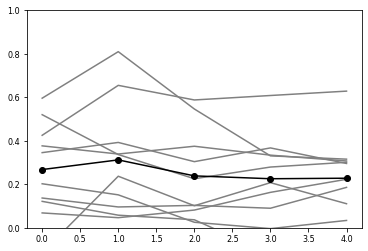

In [230]:
SMI_max_per_cell_l23=compute_SMI(tunings_l23[0][0],True)
plt.plot(SMI_max_per_cell_l23.T,color='gray')
plt.plot(np.nanmean(SMI_max_per_cell_l23,0),'-ok')
plt.ylim([0,1])

n of sesh = 12


(0.0, 1.0)

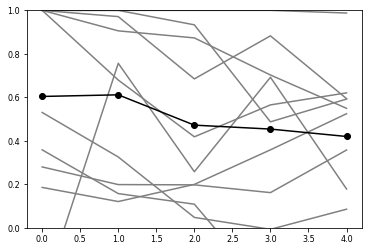

In [231]:

SMI_max_per_l23=compute_SMI(tunings_l23[0][0],False)
plt.plot(SMI_max_per_l23.T,color='gray')
plt.plot(np.nanmean(SMI_max_per_l23,0),'-ok')
plt.ylim([0,1])

n of sesh = 10


(0.0, 1.0)

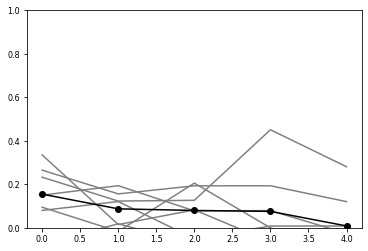

In [232]:

SMI_max_per_cell_l4=compute_SMI(tunings_l4[0][0],True)
plt.plot(SMI_max_per_cell_l4.T,color='gray')
plt.plot(np.nanmean(SMI_max_per_cell_l4,0),'-ok')
plt.ylim([0,1])

n of sesh = 10


(0.0, 1.0)

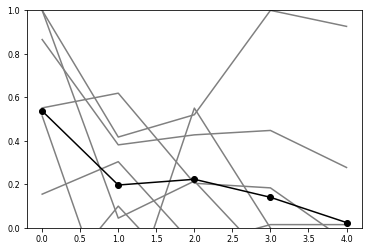

In [233]:

SMI_max_per_l4=compute_SMI(tunings_l4[0][0],False)
plt.plot(SMI_max_per_l4.T,color='gray')
plt.plot(np.nanmean(SMI_max_per_l4,0),'-ok')
plt.ylim([0,1])

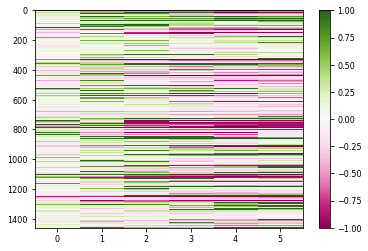

In [142]:
plt.imshow(evoked_60,aspect='auto',vmin=-1,vmax=1,cmap='PiYG')
plt.colorbar()

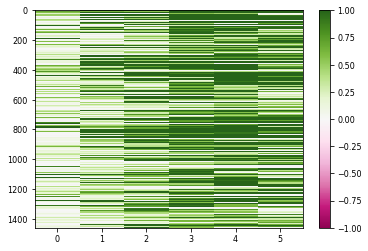

In [141]:
plt.imshow(evoked_max-evoked_60,aspect='auto',vmin=-1,vmax=1,cmap='PiYG')
plt.colorbar()

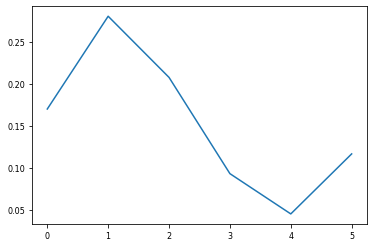

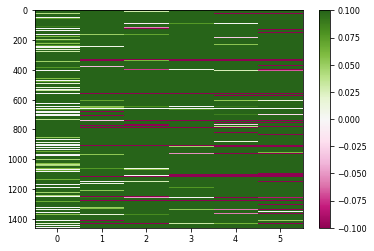

In [136]:
plt.imshow(evoked_max,aspect='auto',vmin=-0.1,vmax=0.1,cmap='PiYG')
plt.colorbar()


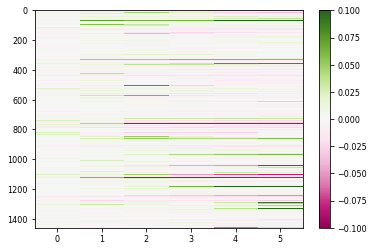

In [94]:
plt.imshow(evoked_60,aspect='auto',vmin=-0.1,vmax=0.1,cmap='PiYG')
plt.colorbar()